A transformada de Fourier possui diversas aplicações em processamento de imagens, como remoção de ruidos, analise de frequencias, identificação de objetos e outros. Abaixo um exemplo da aplicação de uma DFT(Discrete Fourier Transform) exibindo o espectro de magnitude de uma imagem. 

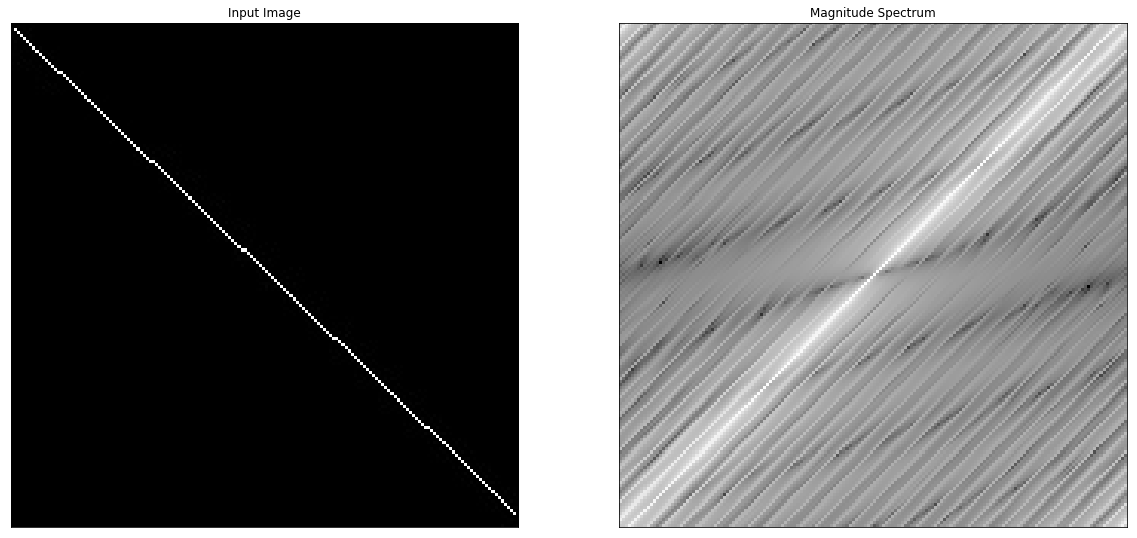

In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

#com numpy
img = cv2.imread('diagonal1.jpg',0)
f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

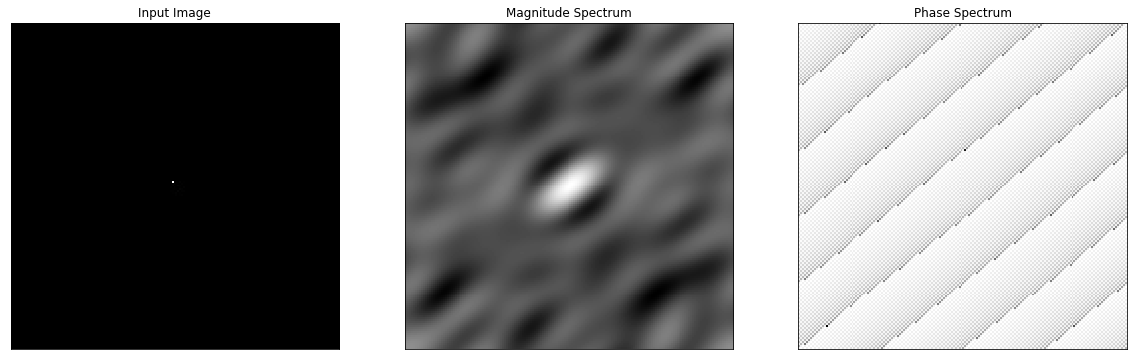

In [115]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

img = cv2.imread('1px.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase_spectrum = 20*np.log(cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Aplicando filtragem passa baixa

Uma das utilizações da DFT é aplicar filtros na imagem, no caso abaixo vimos a passa baixa(LPF) sendo utilizada, onde aplicamos uma mascara a imagem e retiramos as frequencias altas, que geralmente são os contornos da figura, deixando apenas as frequencias baixas, que deixam ela borrada, como abaixo.

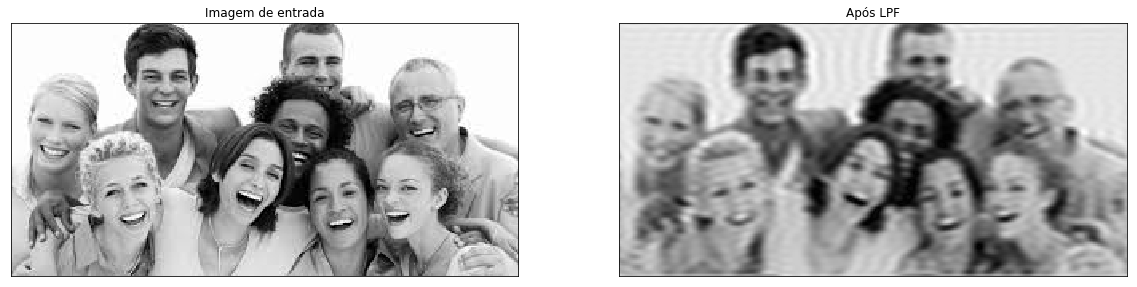

In [100]:
img = cv2.imread('teste2.jpg',0)
f = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
plt.figure(figsize=(20,10))

#LPF 


rows, cols = img.shape 
crow,ccol = rows/2 , cols/2


# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Após LPF'), plt.xticks([]), plt.yticks([])
plt.show()


Aplicando filtragem passa alta.

O contrario da filtragem acima, a filtragem passa alta(HPF) separa somente as altas frequencias, o que ressalta o contorno da imagem. 

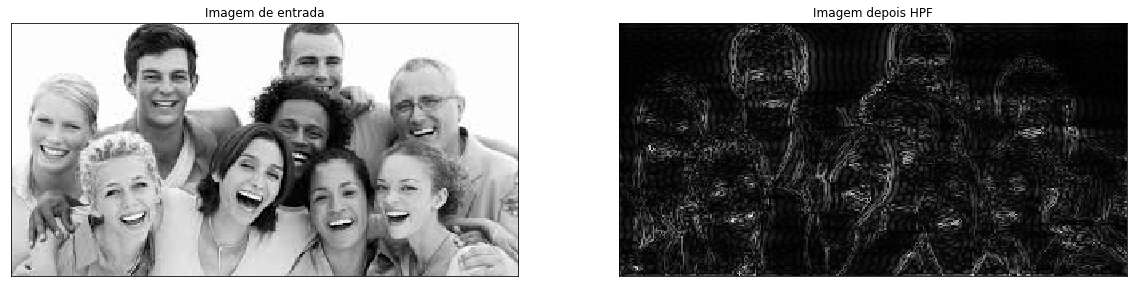

In [96]:
plt.figure(figsize=(20,10))

img = cv2.imread('teste2.jpg',0)
f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))



rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Imagem depois HPF'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(img_back)
#plt.title('Resultado final'), plt.xticks([]), plt.yticks([])

plt.show()


Fontes: 
    
    http://www.inf.pucrs.br/~pinho/CG/Aulas/Img/IMG.htm
    
    http://web.archive.org/web/20130513181427id_/http://sharp.bu.edu/~slehar/fourier/fourier.html#filtering
    
    https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
    
    http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php
    